**INTRODUCTION**

Hi, in this notebook, I'll just doing exercise of using nltk and naive bayes classification algorithm to do a *very simple Spam/Ham* Classification from SMS dataset from UCI

# Module 

In [77]:
# import nltk
# nltk.download("stopwords")
# from nltk.corpus import stopwords
import jieba
import string
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# Config 

In [78]:
debug = False
debug_len = 1000
data_file = "../data/nlp_data/raw_0302.csv"
model_dir = "../model_finished/"
model_file = "model.pkl"

# Data Preparation

In [3]:
df = pd.read_csv(data_file, header=None, sep="\x01")
df.columns = ["text", "class"]

In [4]:
if debug:
    df = df.sample(debug_len)

In [5]:
df.groupby("class").describe()

text                                                               
        count  unique                                               top freq
class                                                                       
0      150759  150744                 兄弟开啤酒的时间到了，最上面的直播间就是官方直播间@吃成胖子还要吃    2
1      173355  170309  长期回购游戏币，100万600元，50万300元，您有金币，我们都要，加QQ1356796641    4

In [6]:
df['length'] = df["text"].apply(str).apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dbc1c3780>,
      dtype=object)

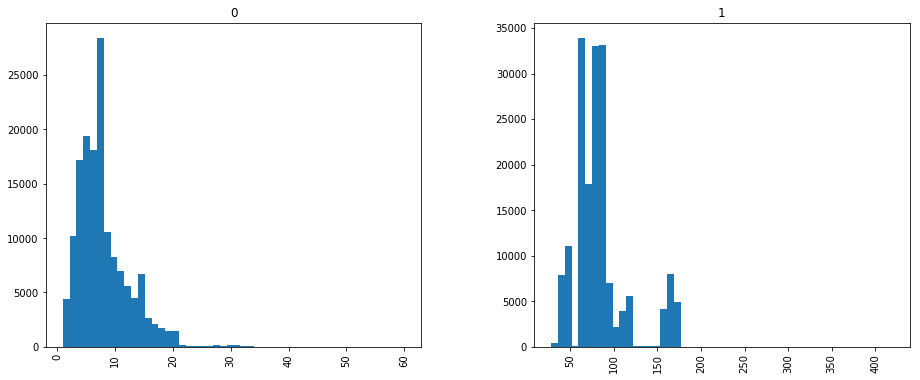

In [7]:
df.hist(column='length',by='class',bins=50, figsize=(15,6))

## CREATE TOKENIZER

In [11]:
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    clean_words = jieba.lcut(str(text))
#     #1
#     nopunc = [char for char in text if char not in string.punctuation]
#     nopunc = ''.join(nopunc)
    
#     #2
#     clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

let's check what above code will produce

In [12]:
df['text'].head().apply(process_text)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.700 seconds.
Prefix dict has been built successfully.


0    [朵朵, 琻, 行, 。, 专业, 24, 小时, 上下, 分, ，, 誠实, 第一,  ,...
1                   [这, 人, 有意思, ，, 不, 认识, ，, 请, 我, 打团]
2    [你好, ，, 回购, 出賣, 琻, 币, ，, 价, ge, 合适, ，, 免费, 蒩, ...
3    [全网, 价格, 最合, shi,  , 収, 出, 琻, 币,  , 出,  , 組, 满...
4    [在, 吗, shuai, 哥, 我, 是, 正规, 工作室, 负责, 琻, 碧, 上下, ...
Name: text, dtype: object

## SPLITTING DATASET

In [13]:
messages = df

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324115 entries, 0 to 324114
Data columns (total 3 columns):
text      324114 non-null object
class     324115 non-null int64
length    324115 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.4+ MB


In [15]:
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2)

In [16]:
len(msg_train)

259292

In [17]:
len(msg_test)

64823

In [18]:
msg_train.head()

248447                                               本钱就不错了
172856    您好,我是正规工作室，负责琻碧上下分!15万JJ豆=100出兽;⑵4万JJ豆=100回収!实...
161617                                         @〖元老〗 你干嘛打宝宝
256830                                         花姐姐不要生气我去楼下了
167934                                             不看着牌出老记错
Name: text, dtype: object

In [19]:
class_train.head()

248447    0
172856    1
161617    0
256830    0
167934    0
Name: class, dtype: int64

# Pipeline

wait, we've just created the tokenizer isn't it? let the pipeline do the rest.

**PART 5: MODEL CREATION**

here I'll just use pipeline in order to minimize effort on doing preprocessing, transforming then training data on both training dataset and test dataset. Using pipeline will handle them all in a few lines of codes.

In [20]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

**PART 6: TESTING**

In [21]:
pipeline.fit(msg_train,class_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process_text at 0x7f9db6e3af28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Evaluation 

In [58]:
predictions = pipeline.predict(msg_test)
print(classification_report(class_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     30061
          1       0.98      1.00      0.99     34762

avg / total       0.99      0.99      0.99     64823



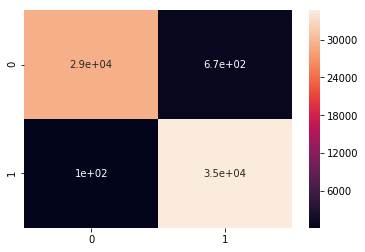

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)

**Notes:**
* we got fairly high but not good enough prediction result here, maybe if the dataset gets higher, maybe naive bayes will do its work better

thanks :)

## Eval data 

In [31]:
eval_df = pd.read_csv("../data/nlp_data/haitun_spam_result_0331.csv", 
#                       sep="\x01",
#                       header=None
                     )

In [32]:
eval_df.head()

,content,prob,real_label
0,?,90,1
1,★,90,1
2,?,90,1
3,Ｋ,90,1
4,?,90,1


In [33]:
eval_df["length"] = eval_df["content"].apply(len)

In [34]:
eval_df = eval_df[eval_df["length"] > 5]

In [35]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052745 entries, 11999 to 1064743
Data columns (total 4 columns):
content       1052745 non-null object
prob          1052745 non-null int64
real_label    1052745 non-null int64
length        1052745 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.2+ MB


In [36]:
predictions = pipeline.predict(eval_df["content"])
print(classification_report(eval_df["real_label"],predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.97      0.99   1052745

avg / total       1.00      0.97      0.99   1052745



/home/guohua/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
len(predictions)

1052745

In [39]:
sum(predictions)

1021790

In [41]:
eval_df.sample(40)

,content,prob,real_label,length
355316,我们zhi保证最真交.易，无论上.下.分多大量，上.分让您拿到琻,90,1,33
368608,长期出琻bi 出蒩满级捕鱼号 手机/威信：①863①4⑨⑤89⑦,90,1,33
116763,在线，详情添加手机薇信同号13868794079,90,1,25
278261,蒩収捕鱼hao，琻豆8-15W100员，薇信XXR666661,90,1,32
743117,"bu鱼shang下芬:上芬16万琻币100,下芬20万琻币100..介绍朋友蒩",90,1,40
956944,长期提供组号丅F.咨询威+ 18692972722;高架回手经典42以上炮台.千炮8000...,90,1,62
1015570,chang期提供组号丄丅F.咨询威+ 18692972722;高架回手经典42以上炮台.千...,90,1,67
815215,chang期蒩鱼炮上xai分业务绝对安全可靠咨询威X+xx17674022115,90,1,41
499104,长期合作优惠！威信⒈3001158982.此宣传小号不回复，请加威信,90,1,35
159869,要的老板可以加我威x:155③21③3①06（同手机）,90,1,28


# Inference 

In [73]:
text = "JJ的玩家你好，好消息2020最火爆黑马棋牌，支持提现的棋牌，复制下方链接到手机浏览器下载"
test_data = np.array([text])
test_data.shape

(1,)

In [74]:
pipeline.predict(test_data)

array([0])

# Save & reload pipeline 

## Save 

In [81]:
file_name = joblib.dump(
    value=pipeline,
    filename=os.path.join(model_dir, model_file)
)[0]

## reload 

In [82]:
new_pipeline = joblib.load(
    filename=file_name
)

In [87]:
new_pipeline.predict_proba(test_data)

array([[0.98792932, 0.01207068]])